In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error

In [17]:
data = pd.read_csv( 'adult.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [18]:
y = data.income
y.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [19]:
data.drop('income',axis=1,inplace=True)

In [6]:
print(' Пустых значений \n'+'-'*50 + '\n', data.isnull().sum() )

 Пустых значений 
--------------------------------------------------
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


In [5]:
# Пустых значений нет, но почему же в описании указали 7% пропусков в 3 столбцах. проверим column = 'workclass' 
data.loc[:,['workclass']].value_counts()

workclass       
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
dtype: int64

Стало быть все же есть пропуски, но называются они '?'.  
Заменим '?' на 0. // ну не удалять же ценные строки.

In [20]:
for i in data.columns: 
    data[i] = data[i].apply(lambda x: 0 if x == '?' else x)

In [7]:
# Проверим
data.loc[:,['occupation']].value_counts()

occupation       
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
0                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
dtype: int64

In [6]:
data.loc[:,['native-country']].value_counts()

native-country            
United-States                 43832
Mexico                          951
0                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
P

In [21]:
columns_for_analysis = ['age', 'workclass', 'education', \
        'marital-status', 'occupation', 'relationship', 'race', 'gender',\
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

X = pd.get_dummies(data.loc[:,columns_for_analysis], columns=['race','gender','workclass','education', 'marital-status','occupation',
                                                              'relationship','native-country'])
X

,age,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,30,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,0,38,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
48838,40,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,0,0,40,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,0,0,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
lab_enc.fit( y )
y_ = lab_enc.transform(y)
y_ , lab_enc.classes_
#1 означает '>50K'

(array([0, 0, 1, ..., 0, 0, 1]), array(['<=50K', '>50K'], dtype=object))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y_,test_size=0.33, random_state=42)
np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((32724, 106), (32724,), (16118, 106), (16118,))

In [11]:
logit = LogisticRegression(penalty= 'elasticnet', solver = 'saga' ,max_iter=1000 ,
                           n_jobs = -1,l1_ratio =0.5, random_state=42, multi_class = 'multinomial')
logit.fit(x_train,y_train)

LogisticRegression(l1_ratio=0.5, max_iter=1000, multi_class='multinomial',
                   n_jobs=-1, penalty='elasticnet', random_state=42,
                   solver='saga')

In [15]:
result = pd.DataFrame(data= logit.coef_,columns=x_train.columns)
result = result.T.sort_values(by =0,ascending=False)
result.head(10)

,0
capital-loss,0.000374
marital-status_Married-civ-spouse,0.000288
relationship_Husband,0.000264
capital-gain,0.000170
occupation_Exec-managerial,0.000084
occupation_Prof-specialty,0.000072
education_Bachelors,0.000063
education_Masters,0.000054
workclass_Self-emp-inc,0.000036
relationship_Wife,0.000030


#### Первичные выводы: 
- если ты много потерял - то много получаешь (№1 capital-loss),
- если ты состоишь в браке - то много получаешь (№2 marital-status_Married),
- если ты в браке мужчина (№3 relationship_Husband)
- остальные топ 10: управленец-манагер, специалист, Бакалавр, Магистр, Самозанятый, в браке женщина.

In [16]:
logit(x_test, y_test) , mean_squared_error(y_test,logit.predict(x_test))

(0.8020846258841047, 0.19791537411589527)

Получили 80% Не так плохо, что мы можем сделать еще ?
- проверим признаки на коллинерность, уберем коллинеарные
- понизим размерность данных PCA
- откалибруем С параметр ( параметр строгости регуляризации ,
- проверим как отработает регуляризация от L1 в ElasticNet ( надеюсь снимет шумные параметры)

<AxesSubplot:>

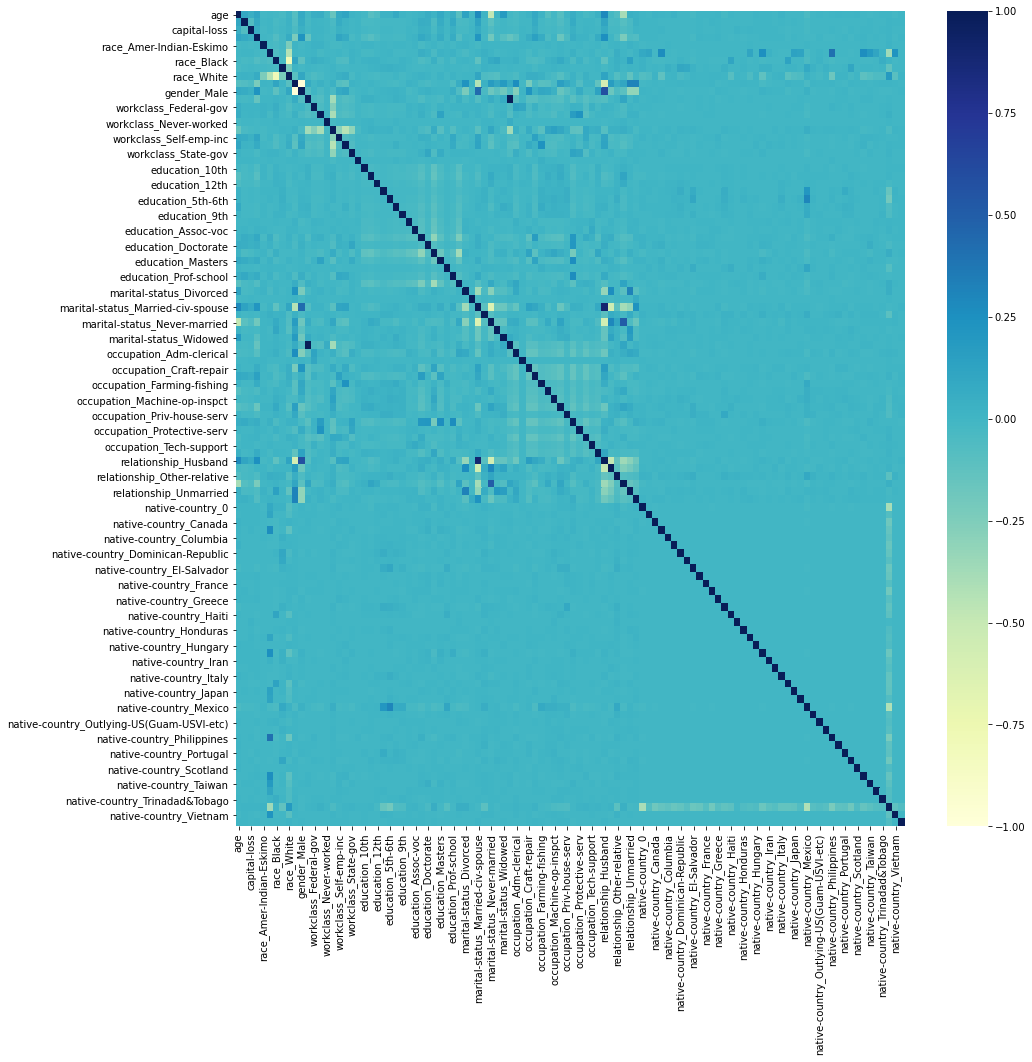

In [17]:
# проверим признаки на коллинерность, уберем коллинеарные
# Сначала отберем признаки с максимальной корреляцией. Так как в основном все параметры категорийные, то будем использовать метод Кендела.
X_ = X.corr(method = 'kendall')

plt.figure(figsize=(15,15))
sns.heatmap(data=X_,cmap='YlGnBu')

Ничего не понятно, надо найти максимумы и минимумы корреляции

In [24]:
X_np = np.array(X_)

In [68]:
min_row = list()
min_corr_coef = list()

max_row = list()
max_corr_coef = list()

for i in range(len(X_np)):
    X_np[i][i] = 0
    min_row.append(X_.columns[np.argmin(X_np[i], axis=0)])
    min_corr_coef.append(np.min(X_np[i]))
    
    max_row.append(X_.columns[np.argmax(X_np[i], axis=0)])
    max_corr_coef.append(np.max(X_np[i])) 

In [72]:
corr_param = pd.DataFrame(data=min_row, index=X_.columns, columns=['min_row'])
corr_param['min_corr_coef'] = min_corr_coef
corr_param['max_row'] = max_row
corr_param['max_corr_coef'] = max_corr_coef

corr_param.sort_values(by='min_corr_coef').head(10)

,min_row,min_corr_coef,max_row,max_corr_coef
gender_Male,gender_Female,-1.000000,relationship_Husband,0.579310
gender_Female,gender_Male,-1.000000,relationship_Wife,0.317284
race_Black,race_White,-0.791096,relationship_Unmarried,0.148007
race_White,race_Black,-0.791096,native-country_United-States,0.194508
marital-status_Married-civ-spouse,marital-status_Never-married,-0.645362,relationship_Husband,0.893676
marital-status_Never-married,marital-status_Married-civ-spouse,-0.645362,relationship_Own-child,0.510863
relationship_Husband,gender_Female,-0.579310,marital-status_Married-civ-spouse,0.893676
relationship_Not-in-family,marital-status_Married-civ-spouse,-0.539571,marital-status_Never-married,0.294898
age,marital-status_Never-married,-0.479929,marital-status_Married-civ-spouse,0.287792
workclass_Self-emp-not-inc,workclass_Private,-0.441487,occupation_Farming-fishing,0.236112


Видно что:
- gender_Male & gender_Female противоположно скорреллированы. Такая корреляция может ухудшать качество логита. Надо дропнуть один из столбцов так как столбец gender категориальный биноминальный.
- relationship_Husband и gender_Female 	имеют обратную корреляцию, странно :) Но дропнуть один из столбцов нельзя, так как  столбец gender категориальный мультиноминальный.
- столбцы race_Black & race_White хоть и противоположно скоррелированы, нельзя дропнуть один из столбцов, так как есть еще один вид race_Other (столбец race категориальный мультиноминальный)

In [82]:
# race_Other
X.race_Other.value_counts()

0    48436
1      406
Name: race_Other, dtype: int64

In [23]:
# Дропнем 'gender_Male'
X.drop('gender_Male',axis=1,inplace=True)

In [84]:
corr_param.sort_values(by='max_corr_coef',ascending=False).head(10)

,min_row,min_corr_coef,max_row,max_corr_coef
workclass_0,workclass_Private,-0.371485,occupation_0,0.998110
occupation_0,workclass_Private,-0.372188,workclass_0,0.998110
marital-status_Married-civ-spouse,marital-status_Never-married,-0.645362,relationship_Husband,0.893676
relationship_Husband,gender_Female,-0.579310,marital-status_Married-civ-spouse,0.893676
gender_Male,gender_Female,-1.000000,relationship_Husband,0.579310
relationship_Own-child,age,-0.389618,marital-status_Never-married,0.510863
marital-status_Never-married,marital-status_Married-civ-spouse,-0.645362,relationship_Own-child,0.510863
native-country_Philippines,native-country_United-States,-0.230572,race_Asian-Pac-Islander,0.410742
race_Asian-Pac-Islander,race_White,-0.435128,native-country_Philippines,0.410742
marital-status_Divorced,marital-status_Married-civ-spouse,-0.364547,relationship_Unmarried,0.326257


Знак '?' (якобы пропущенные значения)  мы заменили на '0' в самом начале ноутбука.  
Столбцы с названием 'workclass_0' 'occupation_0' имеют корреляцию примерно 1 уберем один из столбцов он не несет смысла.

In [24]:
# Дропнем 'occupation_0'
X.drop('occupation_0',axis=1,inplace=True)

In [15]:
# проверим
x_train, x_test, y_train, y_test = train_test_split(X,y_,test_size=0.33, random_state=42)
np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)
logit = LogisticRegression(penalty= 'elasticnet', solver = 'saga' ,max_iter=1000 ,
                           n_jobs = -1,l1_ratio =0.5, random_state=42, multi_class = 'multinomial')
logit.fit(x_train,y_train)
accuracy_score(y_test,logit.predict(x_test)) , mean_squared_error(y_test,logit.predict(x_test))

(0.8020846258841047, 0.19791537411589527)

Не особо что то изменилось..

For n_components 10  the MSE =0.021


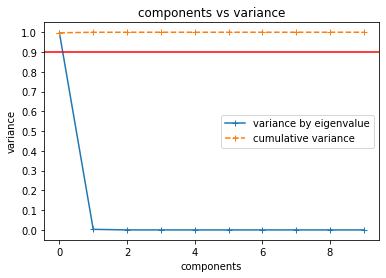

In [18]:
# понизим размерность (PCA)
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

tester = PCA(n_components=10,svd_solver='full' )
a = tester.fit_transform(X)
a_ = tester.inverse_transform(a)
#metrics
mse = mean_squared_error(X,a_)
print(f'For n_components 10  the MSE ={mse:.3f}')

plt.plot(tester.explained_variance_ratio_,'+-', label = 'variance by eigenvalue')
plt.plot(tester.explained_variance_ratio_.cumsum(),'+--',label = 'cumulative variance')
plt.axhline(.9,color='r')
plt.legend()
plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('components')
plt.ylabel('variance')
plt.title('components vs variance');


Судя по графику, то присутствует одно собственное значение с максимальным значением, таким что снижает дисперсию на 100%. То есть один главный вектор.   
Считаю что нет никакого смысла сокращать из 106 параметров выборки до 1 параметра. 

In [13]:
#Откалибруем С параметр ( параметр строгости регуляризации - прямая или полинома)
import optuna

def objective(trial):
    C_ = trial.suggest_uniform('C_', 0, 4)
    
    logit = LogisticRegression( max_iter=1000 , C=C_, n_jobs = -1,random_state=42, multi_class = 'multinomial')
    
    logit.fit(x_train,y_train)
    #accuracy_score(y_test,logit.predict(x_test))
    
    return mean_squared_error(y_test,logit.predict(x_test)) 

study = optuna.create_study()
study.optimize(objective, n_trials=10)

!telegram-send optuna_best_{study.best_params}

study.best_params

[I 2021-06-23 12:24:49,452] A new study created in memory with name: no-name-727a0010-1088-4d88-90cb-6a121e37f11e
[I 2021-06-23 12:25:35,750] Trial 0 finished with value: 0.14387641146544236 and parameters: {'C_': 0.04237907773305549}. Best is trial 0 with value: 0.14387641146544236.
[I 2021-06-23 12:26:22,145] Trial 1 finished with value: 0.14269760516193075 and parameters: {'C_': 3.0601742324371286}. Best is trial 1 with value: 0.14269760516193075.
[I 2021-06-23 12:27:08,237] Trial 2 finished with value: 0.14294577491003846 and parameters: {'C_': 3.546636254888194}. Best is trial 1 with value: 0.14269760516193075.
[I 2021-06-23 12:27:38,879] Trial 3 finished with value: 0.14412458121355007 and parameters: {'C_': 3.0696093986958353}. Best is trial 1 with value: 0.14269760516193075.
[I 2021-06-23 12:28:10,562] Trial 4 finished with value: 0.1448690904578732 and parameters: {'C_': 0.022203747320086453}. Best is trial 1 with value: 0.14269760516193075.
[I 2021-06-23 12:28:56,123] Trial 5

{'C_': 3.0601742324371286}

Так как MSE не поменялся при параметре С от 1 до 3, то дабы не сильно снижать предскательность модели установим С = 1

In [90]:
#проверим как отработает регуляризация от L1 в ElasticNet ( надеюсь снимет шумные параметры)
from sklearn.model_selection import GridSearchCV

changable_val = {'l1_ratio': [0, 0.1, 0.2, 0.3, 0.5,0.7,0.9,1]}

logit_2 = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga', max_iter=1000,n_jobs = -1, random_state=42), \
                       changable_val, scoring = 'neg_mean_squared_error', cv = 10 )
logit_2.fit(X,y_)
logit_2.best_params_
logit_2.best_score_

-0.20336999137408557

In [91]:
!telegram-send Я_посчитал_{logit_2.best_score_}

Можно еще поиграться с test_size, random_state, solver, как-нибудь в следующий раз.

In [ ]:
# Финальный результат для логита:

logit = LogisticRegression(penalty= 'elasticnet', solver = 'saga' ,max_iter=1000 ,
                           n_jobs = -1,l1_ratio =1,C=1, random_state=42, multi_class = 'multinomial')

logit.fit(x_train,y_train)

In [69]:
# Scores
print('Test set scores')
print('-'*55)

logit_MSE = mean_squared_error(y_test,logit.predict(x_test))
logit_mean_accuracy = logit.score(x_test,y_test)
print(f' MSE = { logit_MSE :.2f}, mean_accuracy = {logit_mean_accuracy :.2f} ' )

# Scores on train set
print('\n Train set scores')
print('-'*55)
logit_train_MSE = mean_squared_error(y_train,logit.predict(x_train))
logit_train_mean_accuracy = logit.score(x_train,y_train)
print(f' MSE = { svc_train_MSE :.2f}, mean_accuracy = {svc_train_mean_accuracy :.2f} ' )


Test set scores
-------------------------------------------------------
 MSE = 0.14, mean_accuracy = 0.86 

 Train set scores
-------------------------------------------------------
 MSE = 0.15, mean_accuracy = 0.85 


### SVC

In [44]:
from sklearn.svm import SVC

In [47]:
# Нормализуем выборку

from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler() 
X_normalized = scaler.fit_transform(X)

#Разобъем на тест траеин
x_train, x_test, y_train, y_test = train_test_split(X_normalized,y_,test_size=0.33, random_state=42)

In [ ]:
# протестируем сборку:
regr_svc = SVC(kernel='poly')
regr_svc.fit(x_train,y_train)

In [70]:
# SVC test results
print('Test set scores')
print('-'*55)
svc_MSE = mean_squared_error(y_test,regr_svc.predict(x_test))
svc_mean_accuracy = regr_svc.score(x_test,y_test)
print(f' MSE = { svc_MSE :.2f}, mean_accuracy = {svc_mean_accuracy :.2f} ' )

# Scores on train set
print('\n Train set scores')
print('-'*55)
svc_train_MSE = mean_squared_error(y_train,regr_svc.predict(x_train))
svc_train_mean_accuracy = regr_svc.score(x_train,y_train)
print(f' MSE = { svc_train_MSE :.2f}, mean_accuracy = {svc_train_mean_accuracy :.2f} ' )

Test set scores
-------------------------------------------------------
 MSE = 0.16, mean_accuracy = 0.84 

 Train set scores
-------------------------------------------------------
 MSE = 0.15, mean_accuracy = 0.85 


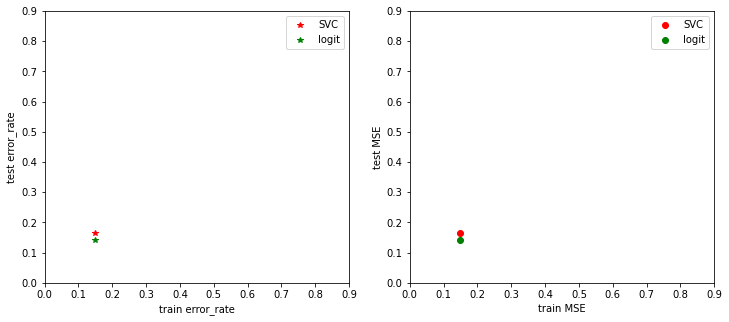

In [89]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(121)
plt.plot(1-svc_train_mean_accuracy, 1-svc_mean_accuracy, 'r*' ,label='SVC')
plt.plot(1-logit_train_mean_accuracy, 1-logit_mean_accuracy, 'g*' ,label='logit')

plt.legend()
plt.xlabel('train error_rate')
plt.ylabel('test error_rate')
plt.xticks(np.arange(0,1,.1));
plt.yticks(np.arange(0,1,.1));

fig.add_subplot(122)
plt.plot(svc_train_MSE, svc_MSE, 'ro' ,label='SVC')
plt.plot(logit_train_MSE, logit_MSE, 'go' ,label='logit')



plt.legend()
plt.xlabel('train MSE')
plt.ylabel('test MSE')
plt.xticks(np.arange(0,1,.1));
plt.yticks(np.arange(0,1,.1));

По графикам видно, что **logit на train и на test даёт лучше результаты**, чем Метод опорных векторов 

Параметры которые можно потюнить:
- C
- kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
- degree ( for poly)
- coef0=0.0

In [73]:
# Параметр C - плавности границы
import optuna

def objective(trial):
    C = trial.suggest_uniform('C', 0, 4)
    regr_svc = SVC(C=C, kernel='rbf')
    
    regr_svc.fit(x_train,y_train)
    #accuracy_score(y_test,logit.predict(x_test))
    
    return mean_squared_error(y_test,regr_svc.predict(x_test)) 

study = optuna.create_study()
study.optimize(objective, n_trials=5)

!telegram-send optuna_best_{study.best_params}

study.best_params

[I 2021-06-24 12:03:26,580] A new study created in memory with name: no-name-388ee147-5d5f-4260-97b8-abe7da9af8da
[I 2021-06-24 12:05:48,982] Trial 0 finished with value: 0.14635810894651943 and parameters: {'C': 2.159096684065285}. Best is trial 0 with value: 0.14635810894651943.
[I 2021-06-24 12:07:45,021] Trial 1 finished with value: 0.1477230425611118 and parameters: {'C': 0.48529879830962175}. Best is trial 0 with value: 0.14635810894651943.
[I 2021-06-24 12:09:46,323] Trial 2 finished with value: 0.15752574761136617 and parameters: {'C': 0.07974776634236669}. Best is trial 0 with value: 0.14635810894651943.
[I 2021-06-24 12:12:20,583] Trial 3 finished with value: 0.14691649087976175 and parameters: {'C': 3.4516038696843383}. Best is trial 0 with value: 0.14635810894651943.
[I 2021-06-24 12:14:46,600] Trial 4 finished with value: 0.1460478967613848 and parameters: {'C': 2.520972271231649}. Best is trial 4 with value: 0.1460478967613848.


{'C': 2.520972271231649}

In [74]:
# Параметр kernel
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf','sigmoid'])
    regr_svc = SVC(kernel=kernel)
    
    regr_svc.fit(x_train,y_train)
    
    return mean_squared_error(y_test,regr_svc.predict(x_test)) 

study = optuna.create_study()
study.optimize(objective, n_trials=4)

!telegram-send optuna_best_{study.best_params}

study.best_params

[I 2021-06-24 12:14:47,940] A new study created in memory with name: no-name-0062be19-c33f-4144-a33a-a0f7b0b4c922
[I 2021-06-24 12:16:35,781] Trial 0 finished with value: 0.16590147661000124 and parameters: {'kernel': 'sigmoid'}. Best is trial 0 with value: 0.16590147661000124.
[I 2021-06-24 12:18:42,780] Trial 1 finished with value: 0.1457997270132771 and parameters: {'kernel': 'rbf'}. Best is trial 1 with value: 0.1457997270132771.
[I 2021-06-24 12:20:29,674] Trial 2 finished with value: 0.16590147661000124 and parameters: {'kernel': 'sigmoid'}. Best is trial 1 with value: 0.1457997270132771.
[I 2021-06-24 12:23:18,346] Trial 3 finished with value: 0.14238739297679612 and parameters: {'kernel': 'linear'}. Best is trial 3 with value: 0.14238739297679612.


{'kernel': 'linear'}

In [76]:
# Параметр coef0
def objective(trial):
    coef0 = trial.suggest_uniform('coef0',  0, 4)
    regr_svc = SVC(C=2.52, kernel='linear',coef0=coef0)
    
    regr_svc.fit(x_train,y_train)
    
    return mean_squared_error(y_test,regr_svc.predict(x_test)) 

study = optuna.create_study()
study.optimize(objective, n_trials=5)

!telegram-send optuna_best_{study.best_params}

study.best_params

[I 2021-06-24 12:32:41,022] A new study created in memory with name: no-name-bdf05bba-92a3-4bcb-8da1-127180b634bc
[I 2021-06-24 12:37:17,803] Trial 0 finished with value: 0.14238739297679612 and parameters: {'coef0': 0.8592277814902642}. Best is trial 0 with value: 0.14238739297679612.
[I 2021-06-24 12:41:54,927] Trial 1 finished with value: 0.14238739297679612 and parameters: {'coef0': 3.309133219504367}. Best is trial 0 with value: 0.14238739297679612.
[I 2021-06-24 12:46:32,359] Trial 2 finished with value: 0.14238739297679612 and parameters: {'coef0': 1.35058783952545}. Best is trial 0 with value: 0.14238739297679612.
[I 2021-06-24 12:51:07,428] Trial 3 finished with value: 0.14238739297679612 and parameters: {'coef0': 2.3923781642672393}. Best is trial 0 with value: 0.14238739297679612.
[I 2021-06-24 12:55:43,076] Trial 4 finished with value: 0.14238739297679612 and parameters: {'coef0': 3.1174533133058153}. Best is trial 0 with value: 0.14238739297679612.


{'coef0': 0.8592277814902642}

In [75]:
# Параметр degree
def objective(trial):
    degree = trial.suggest_int('degree', 1, 5,step=1 )
    regr_svc = SVC(kernel='poly', degree=degree)
    
    regr_svc.fit(x_train,y_train)
    
    return mean_squared_error(y_test,regr_svc.predict(x_test)) 

study = optuna.create_study()
study.optimize(objective, n_trials=5)

!telegram-send optuna_best_{study.best_params}

study.best_params

[I 2021-06-24 12:23:19,306] A new study created in memory with name: no-name-eb1e4e29-0265-49af-b3b2-c719981a2d59
[I 2021-06-24 12:25:10,154] Trial 0 finished with value: 0.15963519047028168 and parameters: {'degree': 2}. Best is trial 0 with value: 0.15963519047028168.
[I 2021-06-24 12:27:32,626] Trial 1 finished with value: 0.1636679488770319 and parameters: {'degree': 3}. Best is trial 0 with value: 0.15963519047028168.
[I 2021-06-24 12:29:00,335] Trial 2 finished with value: 0.1432559870951731 and parameters: {'degree': 1}. Best is trial 2 with value: 0.1432559870951731.
[I 2021-06-24 12:30:50,313] Trial 3 finished with value: 0.15963519047028168 and parameters: {'degree': 2}. Best is trial 2 with value: 0.1432559870951731.
[I 2021-06-24 12:32:40,061] Trial 4 finished with value: 0.15963519047028168 and parameters: {'degree': 2}. Best is trial 2 with value: 0.1432559870951731.


{'degree': 1}

### Best Params Лучшие результаты:
- C = 2.52
- kernel = 'linear'
- degree = 1 : 'poly'
- coef0 = 0.86

применим их:  
так как 
1. MSE для SVC(C=2.52, kernel='linear',coef0=0.86)=.1423,
1. MSE для SVC(kernel='poly', degree=1) =.1432  

То применяем тот, где MSE меньше = №1.

In [90]:
# сборка:
regr_svc = SVC(C=2.52, kernel='linear',coef0=0.86)
regr_svc.fit(x_train,y_train)

# SVC test results
print('Test set scores')
print('-'*55)
svc_MSE = mean_squared_error(y_test,regr_svc.predict(x_test))
svc_mean_accuracy = regr_svc.score(x_test,y_test)
print(f' MSE = { svc_MSE :.2f}, mean_accuracy = {svc_mean_accuracy :.2f} ' )

# Scores on train set
print('\n Train set scores')
print('-'*55)
svc_train_MSE = mean_squared_error(y_train,regr_svc.predict(x_train))
svc_train_mean_accuracy = regr_svc.score(x_train,y_train)
print(f' MSE = { svc_train_MSE :.2f}, mean_accuracy = {svc_train_mean_accuracy :.2f} ' )

Test set scores
-------------------------------------------------------
 MSE = 0.14, mean_accuracy = 0.86 

 Train set scores
-------------------------------------------------------
 MSE = 0.15, mean_accuracy = 0.85 


In [94]:
logit_mean_accuracy,logit_train_mean_accuracy

(0.8568680977788807, 0.8508739762865175)

Text(0, 0.5, 'test MSE')

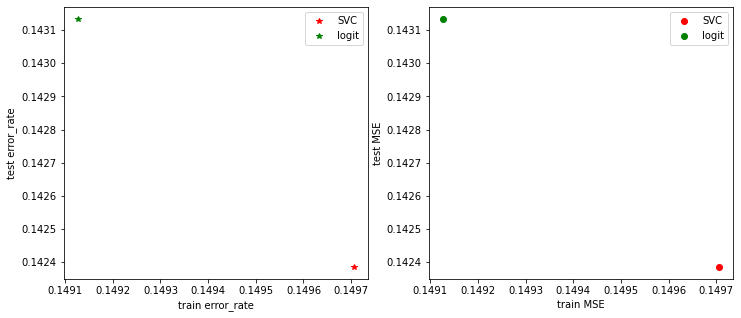

In [96]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(121)
plt.plot(1-svc_train_mean_accuracy, 1-svc_mean_accuracy, 'r*' ,label='SVC')
plt.plot(1-logit_train_mean_accuracy, 1-logit_mean_accuracy, 'g*' ,label='logit')

plt.legend()
plt.xlabel('train error_rate')
plt.ylabel('test error_rate')

fig.add_subplot(122)
plt.plot(svc_train_MSE, svc_MSE, 'ro' ,label='SVC')
plt.plot(logit_train_MSE, logit_MSE, 'go' ,label='logit')



plt.legend()
plt.xlabel('train MSE')
plt.ylabel('test MSE')

После оптимизации **SVC** стал **лучше предсказывать на test**, **чем logit** (в принципе под test мы и оптимизировали)